## 4. Embedding data into 2D using PCA and T-SNE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ptci50k5 because the default path (/home/users/vtang/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Load Time Series

In [2]:
df_vh = pd.read_csv('data/vh_2022.csv', index_col=0, header=0)
df_vh.shape

(7792, 36)

**Note:** t-SNE can not handle time series with NaNs

- option 1: drop incomplete time series
- option 2: fill small gaps

In [3]:
# fill small gaps using linear interpolation
df_vh = df_vh.interpolate(method='linear', axis=1, limit=1)

# drop incomplete time series
df_vh = df_vh.dropna(how='any', axis=0)

In [4]:
data = df_vh.values

pid = df_vh.index.values

# Embedding with PCA

In [5]:
n_dim = data.shape[1]

pca = PCA(n_components=n_dim)
pcs = pca.fit_transform(data)

np.round(pca.explained_variance_ratio_, 3)

array([0.649, 0.088, 0.064, 0.034, 0.03 , 0.027, 0.015, 0.013, 0.01 ,
       0.009, 0.007, 0.007, 0.005, 0.005, 0.004, 0.003, 0.003, 0.003,
       0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.   ])

In [6]:
df_pca = pd.DataFrame(pcs, columns=[f'PC{i}' for i in range(1, n_dim+1)])
df_pca['label'] = np.nan

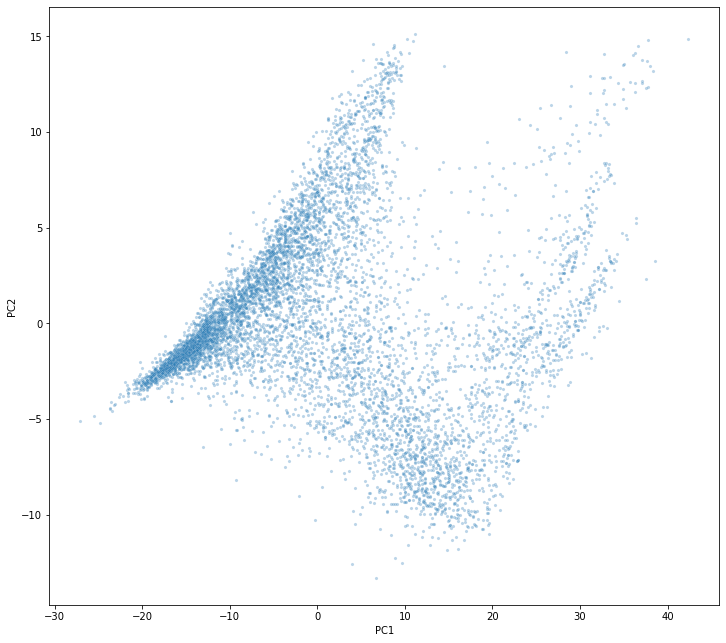

In [7]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', alpha=0.3, s=10)
plt.gcf().set_size_inches([12, 11])

# Embedding with t-SNE

recommend to use first 10 PCs from PCA, which explained more than 99% variation of dataset

In [8]:
tsne = TSNE(
    n_components=2, random_state=0,  perplexity=80, learning_rate='auto', n_iter=2000,
    n_jobs=-1, early_exaggeration=24,
)
tsne2d = tsne.fit_transform(pcs[:, :10])

In [9]:
df_tsne2d = pd.DataFrame(tsne2d, index=pid, columns=['x', 'y'])

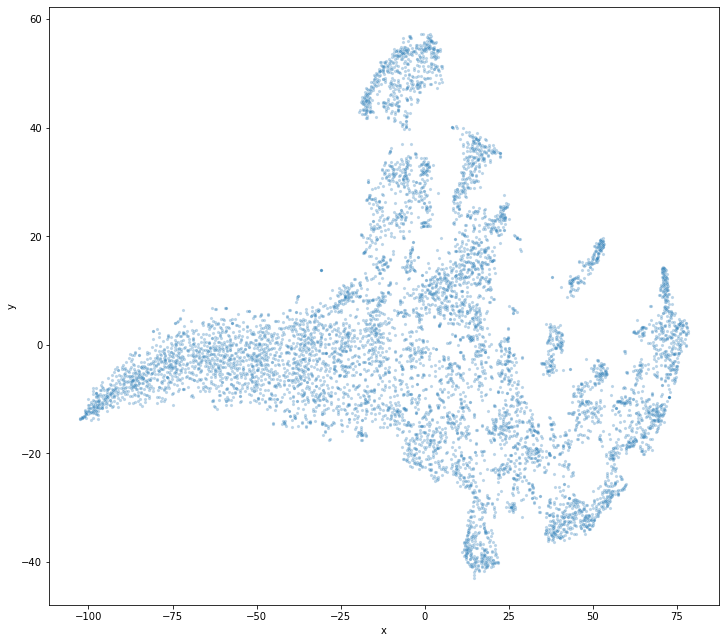

In [10]:
sns.scatterplot(data=df_tsne2d, x='x', y='y', alpha=0.3, s=10)
plt.gcf().set_size_inches([12, 11])

In [11]:
# df_tsne2d.to_csv(f'data/tsne2d_2022.csv')